In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
caminho = r'C:\Users\vitor\Desktop\Estágio\Projetos\CNPJs\Responsivo -Streamlit\planilhas\despesas-mpe.xlsx'

In [18]:
df = pd.read_excel(caminho)
# Renomear coluna
df = df.rename(columns={'Natureza da Despesa': 'Categoria da Despesa'})

# Arredondar a porcentagem
df['(%)MPE/TOTAL'] = df['(%)MPE/TOTAL'].round(2)

# Remover a coluna "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'], axis=1)

df.head(7)

,Município,Categoria da Despesa,Total das Compras (R$),Valor MPE (R$),(%)MPE/TOTAL
0,Alto Santo,Equipamentos e Material Permanente,1842458.70,544167.67,29.53
1,Alto Santo,Material de Consumo,10293097.08,3716742.70,36.11
2,Alto Santo,"Material, Bem ou Serviço para Distribuição Gra...",158782.78,140721.48,88.63
3,Alto Santo,Obras e Instalações,5853693.40,5648471.75,96.49
4,Alto Santo,Outros Serviços de Terceiros - Pessoa Jurídica,13910521.01,11521170.82,82.82
5,Alto Santo,Serviços de Tecnologia da Informação e Comunic...,224579.20,160403.20,71.42
6,Ererê,Equipamentos e Material Permanente,1279035.63,616034.63,48.16


In [20]:
analise1 = df.groupby('Município').sum().reset_index()[['Município', 'Total das Compras (R$)', 'Valor MPE (R$)']]
pd.options.display.float_format = '{:.2f}'.format
analise1['Porcentagem'] = (analise1['Valor MPE (R$)'] / analise1['Total das Compras (R$)']) * 100
analise1['Porcentagem'] = analise1['Porcentagem'].round(2)  # Arredondamento para duas casas decimais



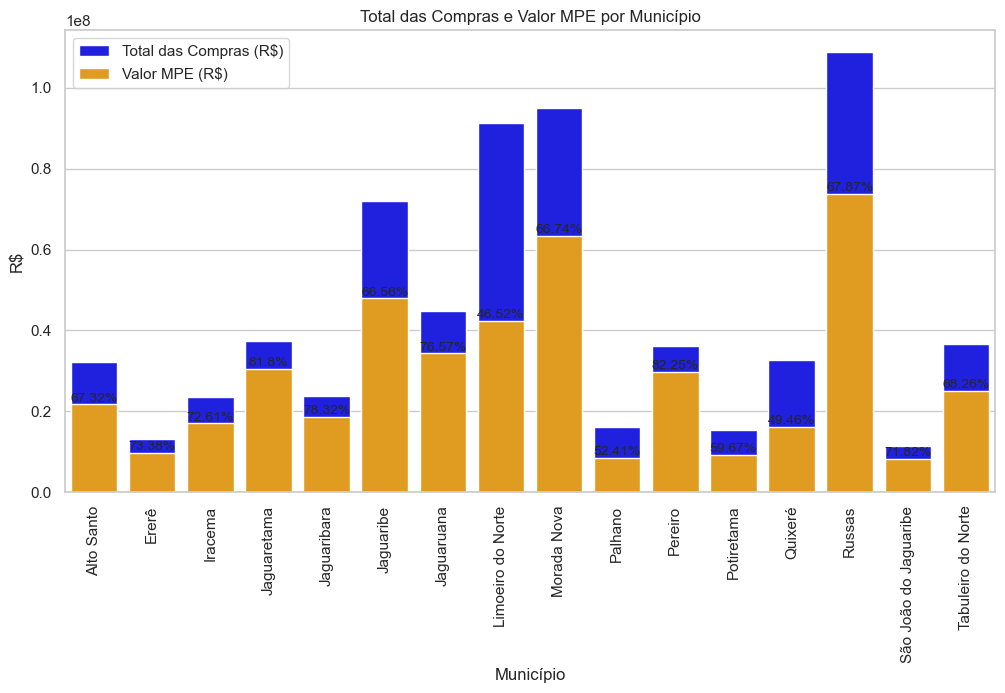

In [24]:
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Criando o gráfico de barras
    ax = sns.barplot(x='Município', y='Total das Compras (R$)', data=analise1, color='blue', label='Total das Compras (R$)')
    ax = sns.barplot(x='Município', y='Valor MPE (R$)', data=analise1, color='orange', label='Valor MPE (R$)')

    # Adicionando as porcentagens acima das barras do Valor MPE
    for index, value in enumerate(analise1['Porcentagem']):
        ax.text(index, analise1.loc[index, 'Valor MPE (R$)'], f'{value}%', ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=90)
    plt.ylabel('R$')
    plt.title('Total das Compras e Valor MPE por Município')
    plt.legend()
    plt.show()